In [23]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import tensorflow as tf
import cv2
import matplotlib

In [7]:
path_dataset = "../FER2013_ver2/test"
emotions = os.listdir(path_dataset)
path_model = "./model2_CNN"
model = tf.keras.models.load_model(path_model)

In [8]:
def predicted_emotion(array):
    label_map = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
    return label_map[np.argmax(array)]

In [9]:
correct_values = []
predicted_values = []
for i in emotions:
    for image_path in os.listdir(os.path.join(path_dataset, i)):
        correct_values.append(i)
        image = cv2.imread(os.path.join(path_dataset, i, image_path))
        image = cv2.resize(image, (48, 48))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image.reshape((1, 48, 48, 1))
        predicted_values.append(predicted_emotion(model.predict(x=image, verbose=0)))

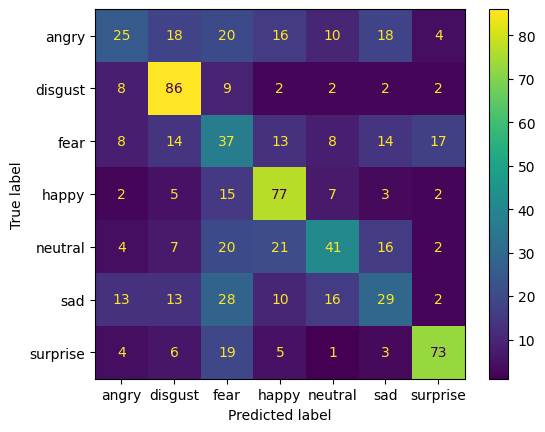

In [24]:
confusionMatrix = sk.metrics.confusion_matrix(y_true=correct_values, y_pred=predicted_values, labels=emotions)
confusionMatrixDisplay = sk.metrics.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix,display_labels=emotions)
confusionMatrixDisplay.plot()

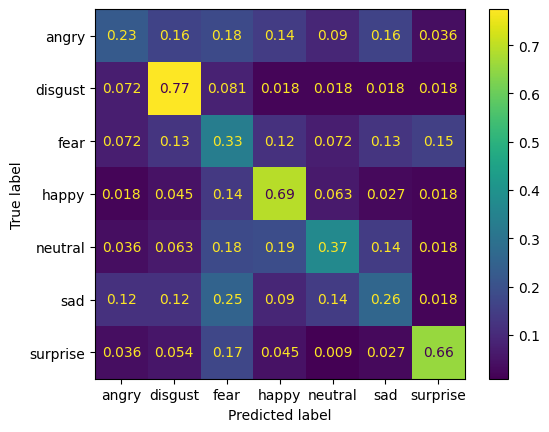

In [25]:
confusionMatrix2 = sk.metrics.confusion_matrix(y_true=correct_values, y_pred=predicted_values, labels=emotions, normalize="true")
confusionMatrixDisplay = sk.metrics.ConfusionMatrixDisplay(confusion_matrix=confusionMatrix2,display_labels=emotions)
confusionMatrixDisplay.plot()

In [26]:
report = sk.metrics.classification_report(y_true=correct_values, y_pred=predicted_values, labels=emotions, target_names=emotions, digits=3)
print(report)

              precision    recall  f1-score   support

       angry      0.391     0.225     0.286       111
     disgust      0.577     0.775     0.662       111
        fear      0.250     0.333     0.286       111
       happy      0.535     0.694     0.604       111
     neutral      0.482     0.369     0.418       111
         sad      0.341     0.261     0.296       111
    surprise      0.716     0.658     0.685       111

    accuracy                          0.474       777
   macro avg      0.470     0.474     0.462       777
weighted avg      0.470     0.474     0.462       777


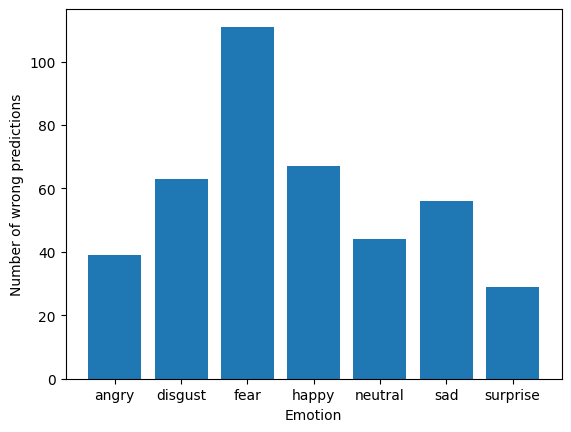

In [27]:
numer_of_wrong_predictions = {}
for i in emotions:
    numer_of_wrong_predictions[i] = sum(confusionMatrix[:, emotions.index(i)]) - confusionMatrix[emotions.index(i), emotions.index(i)]
matplotlib.pyplot.bar(numer_of_wrong_predictions.keys(), numer_of_wrong_predictions.values())
matplotlib.pyplot.xlabel('Emotion')
matplotlib.pyplot.ylabel('Number of wrong predictions')
matplotlib.pyplot.show()

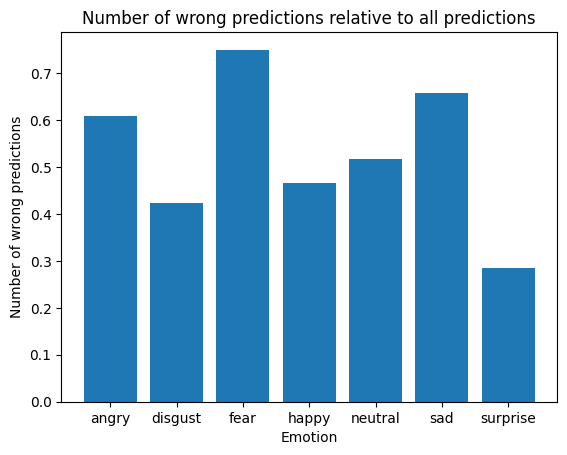

In [28]:
numer_of_wrong_predictions = {}
for i in emotions:
    numer_of_wrong_predictions[i] = (sum(confusionMatrix[:, emotions.index(i)]) - confusionMatrix[emotions.index(i), emotions.index(i)]) / sum(confusionMatrix[:, emotions.index(i)])
matplotlib.pyplot.bar(numer_of_wrong_predictions.keys(), numer_of_wrong_predictions.values())
matplotlib.pyplot.xlabel('Emotion')
matplotlib.pyplot.ylabel('Number of wrong predictions')
matplotlib.pyplot.title('Number of wrong predictions relative to all predictions')
matplotlib.pyplot.show()

In [29]:
correct_values_numerical = [emotions.index(i) for i in correct_values]
predicted_values_numerical = [emotions.index(i) for i in predicted_values]
falsePositiveRate = []
truePositiveRate = []
areaUnderGraph = []
for i in range(len(emotions)):
    fp, tp, _ = sk.metrics.roc_curve(correct_values_numerical, predicted_values_numerical, pos_label=i)
    falsePositiveRate.append(fp)
    truePositiveRate.append(tp)
    areaUnderGraph.append(sk.metrics.auc(fp, tp))

Text(0.5, 1.0, 'Receiver Operating Characteristic')

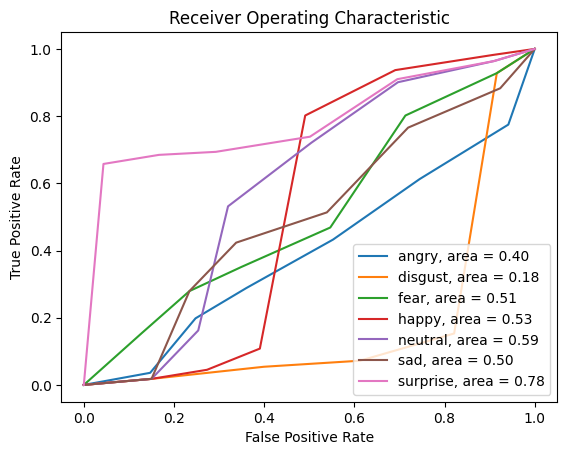

In [30]:
for i in emotions:
    matplotlib.pyplot.plot(falsePositiveRate[emotions.index(i)],truePositiveRate[emotions.index(i)], label=f'{i}, area = {areaUnderGraph[emotions.index(i)]:.2f}')
matplotlib.pyplot.legend(loc='lower right')
matplotlib.pyplot.xlabel('False Positive Rate')
matplotlib.pyplot.ylabel('True Positive Rate')
matplotlib.pyplot.title('Receiver Operating Characteristic')